# Word Embeddings

We are going to study the word embeddings of the dataset. In the corpus each quotation is going to be a document. We will do this in order to find and analyze the semantic difference between the persons polarized positively and negatively.


We start by importing the necessary libraries and setup the colab environement.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("drive/Shareddrives/ADA/ada-2021-project-adada-sur-mon-bidet")

In [ ]:
import sys
!pip install -U pandas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from helpers import helpers
from importlib import reload
from collections import Counter
from time import time
import nltk
! pip install "gensim==4.0.1"
import gensim
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment import SentimentIntensityAnalyzer
reload(helpers)
from tqdm import tqdm
tqdm.pandas()

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
%matplotlib inline 

plt.style.use('seaborn-deep')

### The data

We start by loading the data. We keep only the necessary features and computing the sentiments using Vader.

In [ ]:
df = pd.read_pickle("output/sanitized_df")

In [ ]:
df = df.drop(["qids", "numOccurrences", "urls", "phase", "quoteLength", "quoteWC"], axis=1)
df.head()

,quotation,speaker,date
quoteID,,,
2020-02-21-000455,2019 was a landmark year for fiverr as we comp...,Micha Kaufman,2020-02-21 13:00:00
2020-03-01-005419,councils and communities are passionate about ...,Linda Scott,2020-03-01 16:30:28
2020-03-09-038856,march has the largest amount of acreage burned...,Michael Guy,2020-03-09 07:37:02
2020-02-13-075454,response to the whole range of russian missile...,Jens Stoltenberg,2020-02-13 09:21:05
2020-02-10-076321,the national energy and climate plans are how ...,Kadri Simson,2020-02-10 05:51:51


Once we've loaded the data we preprocess the quotes. We apply stopword removal, bigram adding, lemmatization etc.

In [ ]:
df["prep_quote"] = df.quotation.progress_apply(helpers.preprocess_quote)

100%|██████████| 280720/280720 [14:17<00:00, 327.46it/s]


Here we add the sentiment associated to each quote. There is 3 kinds of sentiment, positive, negative, neutral, a and score, compound which is a summarization of the three before. For reason detailed in the datastory and before, we will consider only the last one as the polarity score.

In [ ]:
### Sentiment analysis function designed by Harold

def analyze_sentiment(text, sia, sent):
    """
    Given text, outputs VADER polarity scores with explanations

    Args:
        text (string)
    """
    polarity_scores = sia.polarity_scores(text)
    return polarity_scores[sent]

In [ ]:
sia = SentimentIntensityAnalyzer()
for sent in ['neg', 'neu', 'pos', 'compound']:
  print("For sentiment ", sent, " :")
  df[sent] = df.quotation.progress_apply(lambda text : analyze_sentiment(text, sia, sent))

For sentiment  neg  :


100%|██████████| 280720/280720 [02:29<00:00, 1882.85it/s]


For sentiment  neu  :


100%|██████████| 280720/280720 [02:29<00:00, 1883.88it/s]


For sentiment  pos  :


100%|██████████| 280720/280720 [02:29<00:00, 1881.91it/s]


For sentiment  compound  :


100%|██████████| 280720/280720 [02:29<00:00, 1877.44it/s]


In [ ]:
df.head()

,quotation,speaker,date,prep_quote,neg,neu,pos,compound
quoteID,,,,,,,,
2020-02-21-000455,2019 was a landmark year for fiverr as we comp...,Micha Kaufman,2020-02-21 13:00:00,"[landmark, year, fiverr, completed, successful...",0.000,0.634,0.366,0.9117
2020-03-01-005419,councils and communities are passionate about ...,Linda Scott,2020-03-01 16:30:28,"[councils, communities, passionate, bit, waste...",0.095,0.772,0.133,0.1154
2020-03-09-038856,march has the largest amount of acreage burned...,Michael Guy,2020-03-09 07:37:02,"[march, largest, amount, acreage, burned, well...",0.000,0.870,0.130,0.2732
2020-02-13-075454,response to the whole range of russian missile...,Jens Stoltenberg,2020-02-13 09:21:05,"[response, whole, range, russian, missile, sys...",0.000,1.000,0.000,0.0000
2020-02-10-076321,the national energy and climate plans are how ...,Kadri Simson,2020-02-10 05:51:51,"[national, energy, climate, plans, chart, cour...",0.163,0.718,0.119,-0.2585


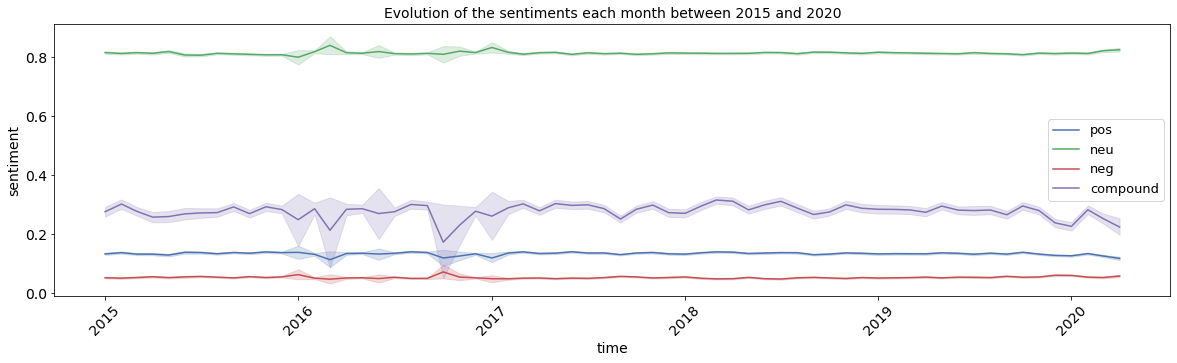

In [ ]:
f, a = plt.subplots(figsize=(20, 5))
sents = ["pos", "neu", "neg", "compound"]
dfs = dfs.sort_values(["year", "month"])
for sent in sents:
  sns.lineplot(data=dfs, x="dayless_date", y=sent)
a.set_ylabel("sentiment", fontsize=14)
a.set_xlabel("time", fontsize=14)

a.set_title("Evolution of the sentiments each month between 2015 and 2020", fontsize=14)
plt.xticks(rotation=45)
plt.legend(sents, fontsize=13)
plt.setp(a.get_xticklabels(), fontsize=14)
plt.setp(a.get_yticklabels(), fontsize=14)
plt.savefig("antoine_plots/sentiment_evolution.png", dpi=300);

Above you can see the evolution thoughout time of the sentiments. We can see directly (as shown before in the notebook) that the compound has way more variance then the other sentiments. Here you can show the mean and the meadian of each of the sentiments alongside there confidence intervals (CIs).

In [ ]:
helpers.CIs(data=dfs, columns=sents, funcs=[np.mean, np.median])

,pos,neu,neg,compound
mean_low,0.133764,0.813551,0.051736,0.280706
mean_computed,0.134149,0.813862,0.051988,0.282286
mean_high,0.134470,0.814248,0.052253,0.284085
median_low,0.119000,0.819000,0.000000,0.361200
median_computed,0.120000,0.819000,0.000000,0.361200
median_high,0.120000,0.820000,0.000000,0.361200


The final dataset is then stored into a pickle file so that we have to do this part only once.

# Computing the word embeddings

Now we can compute the word embeddings for each of the quotations. To do so we will use the function developed in `helpers.py`.

- `helpers.aggregate`computes the word embeddings for each word of a sentence aggregate the results through a simple mean to get the vector related through a whole sentence.
- `helpers.par_process` which contains the whole pipeline that 
  - preprocesses the text of the quotation
  - compute each of the word embeddings
  - compute the normalized cut month by month
  - display the overall result (colored differentely as a function of the polarity score)

Since this routine is very long uses massive parallelism to get to acceptable runtime.


In [ ]:
dfs = pd.read_pickle("output/WE_prep_df.pkl") ## previously preprocessed data

In [ ]:
model = helpers.get_model() ## loading the model

In [ ]:
## These feature will be usefull to have meaningful xticks on the plots.
dfs["month"] = pd.DatetimeIndex(dfs.date).month
dfs["year"] = pd.DatetimeIndex(dfs.date).year

In [ ]:
## We will try to see the evolution month by month so we det rid of the day in the date
dfs["dayless_date"] = pd.to_datetime(dfs.date).apply(lambda t : t.replace(day=1, hour=0, minute=0, second=0))

We compute the evolution of the **normalized cut** month by month. This metrics represent the semantic difference between the group that are polarized differently.

In [ ]:
start = time()
metrics = helpers.par_process(dfs, model, sentiment="compound", display_dims=3)[0]

In [ ]:
print(f"It took {round(time() - start, 2)} s")

It took 163.9 s


The **normalized cut** is a measure used in [this paper](https://ieeexplore.ieee.org/document/8181508) to assess the polarization between two clusters with word embeddings. It's expressed as follows :   


$N_{A, B} = \frac{\sum_{i=1}^{n} d_{A,B}(i)}{\sum_{i=1}^{n} d_{A,B}(i) + \sum_{i=1}^{n_A} d_{A}(i)} + \frac{\sum_{i=1}^{n} d_{A,B}(i)}{\sum_{i=1}^{n} d_{A,B}(i) + \sum_{i=1}^{n_B} d_{B}(i)}$

As said in the paper :      
- $d_{A,B}$ is the distance between two vectors in $A$ and $B$
- $n$ is the number of such pairs
- $d_X$ is the single pair-wise distance between two vectors within groups $X \in \{A, B\}$
- $n_X$ the number of such pairs


As an interpretation, the higher this value, the larger the **between-group** distance compared to the **within-group** distance.


In the future we could also compute CIs as the researchers did using bootstraping for each cut.

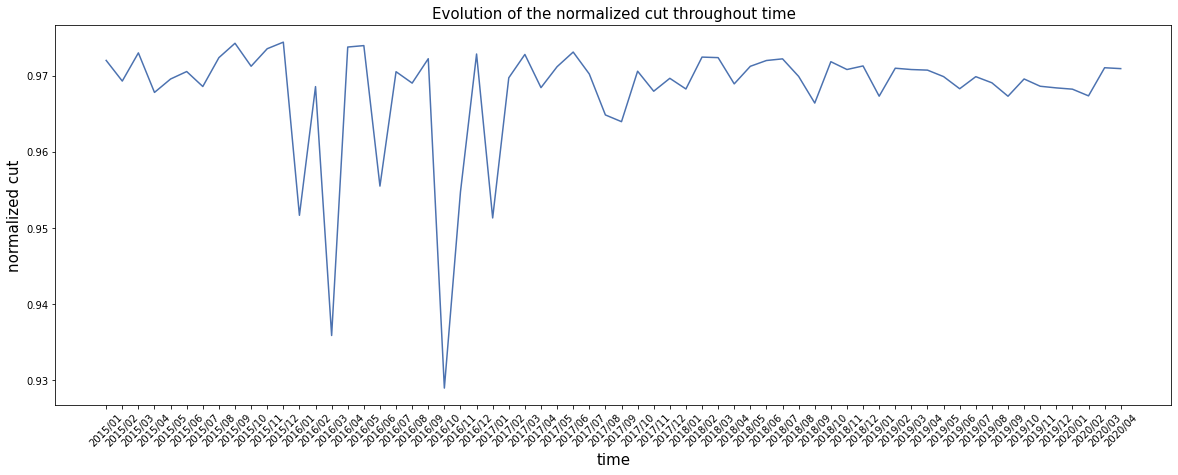

In [ ]:
f, a = plt.subplots(figsize=(20, 7))
rmet = np.array(list(metrics))
sel_indices = np.arange(len(rmet))
rmet = rmet[sel_indices]
xticklabels = np.unique(dfs.sort_values("dayless_date")[["year", "month"]].apply(lambda e : str(e[0]) + "/" + ("%02d" % e[1]), axis=1).values)[sel_indices]
xticks = np.arange(len(xticklabels))[sel_indices]

plt.plot(xticks, rmet)

a.set_xticks(xticks)
a.set_xticklabels(xticklabels, rotation=45)
a.set_title("Evolution of the normalized cut throughout time", fontsize=15)
a.set_xlabel("time", fontsize=15)
a.set_ylabel("normalized cut", fontsize=15)
plt.savefig("antoine_plots/normalized_cut_evolution.png", dpi=300);

We can see that the semantic difference between the polarization is rather big and constant throughout time. The huge variations we can encounter in 2016 are mostly due to the lack of data in these year leading to poor difference between clusters.

In [ ]:
statDf = pd.DataFrame(np.array([dfs.groupby("dayless_date").count()["quotation"].values, rmet]).T, columns=["count", "nc"])

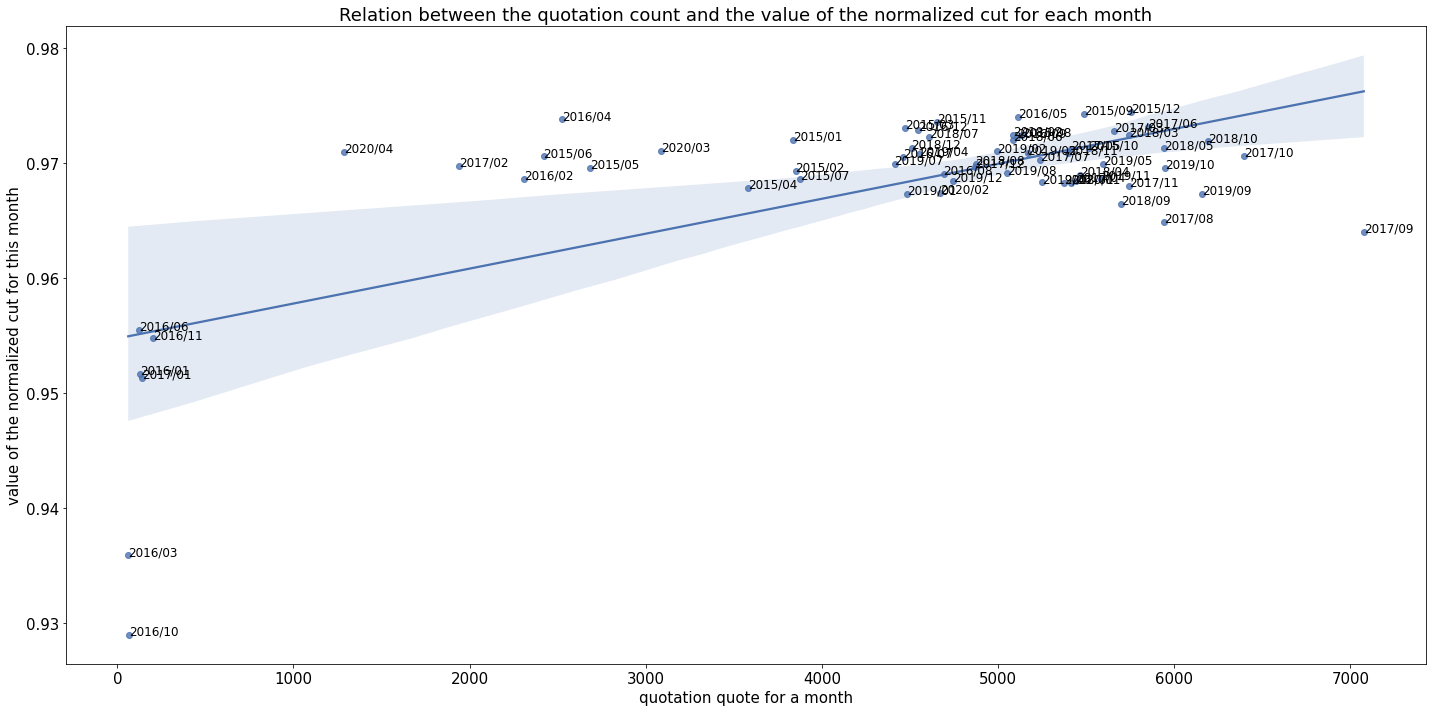

In [ ]:
f, a = plt.subplots(figsize=(20, 10))
sns.regplot(data=statDf, x="count", y="nc")

for i, stat in enumerate(statDf[["count", "nc"]].values):
  a.annotate(xticklabels[i], stat, fontsize=12)

a.set_xlabel("quotation quote for a month", fontsize=15)
a.set_ylabel("value of the normalized cut for this month", fontsize=15)
a.set_title("Relation between the quotation count and the value of the normalized cut for each month", fontsize=18)
plt.setp(a.get_xticklabels(), fontsize=15)
plt.setp(a.get_yticklabels(), fontsize=15)
plt.tight_layout()
plt.savefig("antoine_plots/normalized_cut_per_count.png", dpi=300);

In this scatter plot we see that for month having more than 1000 quote, the normalized has steady values. For june, november, march and october of 2016 the quotation count is really small and the values have smaller values and overall a big variance.


We can plot the word embeddings for each of the documents of the dataset at once and we get this :

/content/drive/.shortcut-targets-by-id/1-52FLdULH9Pqio_7BjPk1v2dNERB8vcm/ada-2021-project-adada-sur-mon-bidet/helpers/helpers.py:345: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


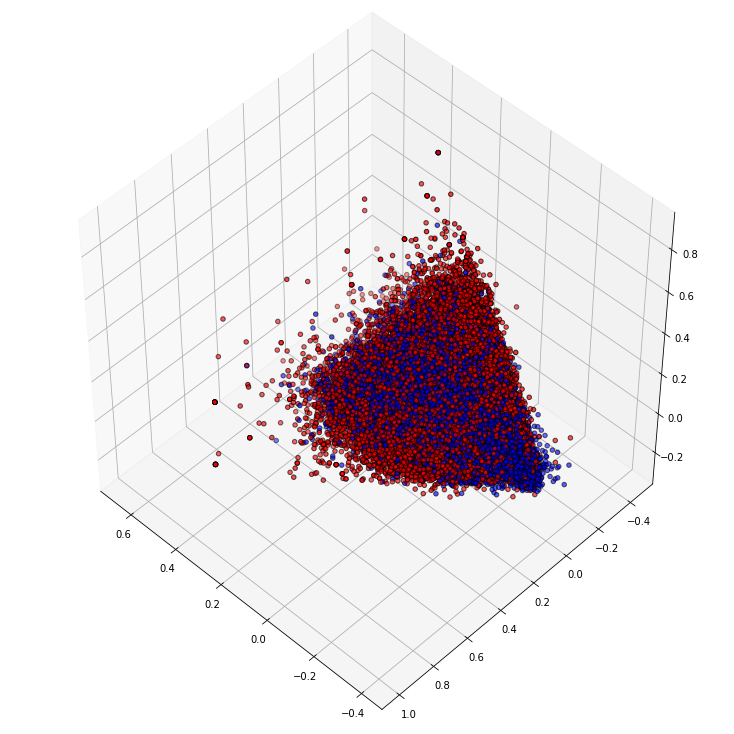

In [ ]:
vec_space, labels = helpers.get_w2c_matrix(model, dfs, "prep_quote", "compound")
helpers.show_w2v_words(vec_space, outfilename=f"medias/W2V_full.png", colors=helpers.get_cmap_from_labels(labels), dimensions=3)

We can see that the clusters aren't clear. To have more meaningful result we can try to get rid of the quotation that aren't really polarized and keep only the documents with a significant polarization score (whether it be negative or positive).

In [ ]:
def extract_extremes(data, column="compound", threshold=15):
    bounds = np.percentile(data[column], (threshold, 100 - threshold))
    return bounds, data[(data[column] < bounds[0]) | (data[column] > bounds[1])]


vec_space, labels = helpers.get_w2c_matrix(model, extract_extrems(dfs), "prep_quote", "compound")
helpers.show_w2v_words(vec_space, outfilename=f"medias/W2V_full.png", colors=helpers.get_cmap_from_labels(labels), dimensions=3)

/content/drive/.shortcut-targets-by-id/1-52FLdULH9Pqio_7BjPk1v2dNERB8vcm/ada-2021-project-adada-sur-mon-bidet/helpers/helpers.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data[labels] >= 0.282] = 1
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/content/drive/.shortcut-targets-by-id/1-52FLdULH9Pqio_7BjPk1v2dNERB8vcm/ada-2021-project-adada-sur-mon-bidet/helpers/helpers.py:242: SettingWithCopyWarning: 
A valu

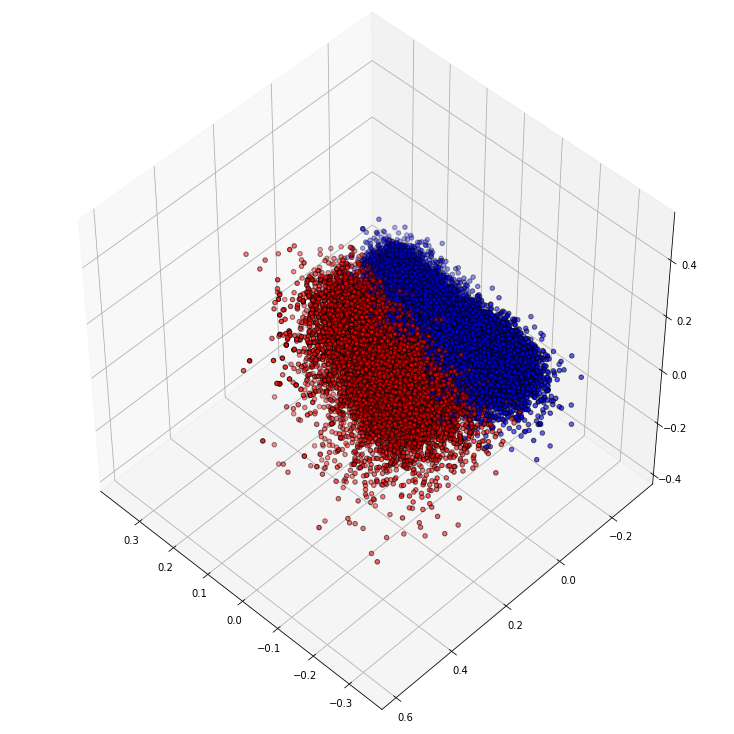

In [ ]:
vec_space, labels = helpers.get_w2c_matrix(model, extract_extremes(dfs, threshold=5)[1], "prep_quote", "compound")
helpers.show_w2v_words(vec_space, outfilename=f"medias/W2V_full.png", colors=helpers.get_cmap_from_labels(labels), dimensions=3)

We can see that the semantic difference between the two groups is now very clear if we remove quotation not strongly polarized.

# Final Pipeline for user input

The idea here is to provide a bonus for the datastory. We can build a function for which the user is asked to input a sentence about the climate change. Then the build algorithm is going to show him the personality in the dataset that is the most siimilar to him. This can than display where the user is with respect to the other cited people.

In [ ]:
cpos = vec_space[labels == 1]
cneg = vec_space[labels == -1]
extremes = extract_extremes(dfs, threshold=5)[1]
vec_space, labels = helpers.get_w2c_matrix(model, extremes, "prep_quote", "compound")

def get_similar_quotes(quote):
  vec = helpers.aggregate(model, helpers.preprocess_quote(quote))
  dists = []
  for support_vec in vec_space:
    dists.append(helpers.euclidean_dist(vec, support_vec))
  dists = np.array(dists)
  closest_idx = np.argmin(dists)
  quote_entry = extremes.iloc[closest_idx]
  print(f"Quote said by : ", quote_entry.speaker)
  print(f"Quote : ", quote_entry.quotation)

  neg_dist = np.mean(helpers.__dist(model, vec, cneg))
  pos_dist = np.mean(helpers.__dist(model, vec, cpos))

  print(f"Distance to negative quotes : ", neg_dist)
  print(f"Distance to positive quotes : ", pos_dist)
  quote_point = vec.reshape((1, -1))
  helpers.show_quote_in_set(vec_space, dimensions=2, colors=helpers.get_cmap_from_labels(labels), quote_point=quote_point)
  return vec

/content/drive/.shortcut-targets-by-id/1-52FLdULH9Pqio_7BjPk1v2dNERB8vcm/ada-2021-project-adada-sur-mon-bidet/helpers/helpers.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data[labels] >= 0.282] = 1
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/content/drive/.shortcut-targets-by-id/1-52FLdULH9Pqio_7BjPk1v2dNERB8vcm/ada-2021-project-adada-sur-mon-bidet/helpers/helpers.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

Quote said by :  James Cameron
Quote :  but this is for the other people who believe climate change is a real problem but have problems with other issues 
Distance to negative quotes :  0.72861964
Distance to positive quotes :  0.72599685
>>> saving at  W2V_quote.png


/content/drive/.shortcut-targets-by-id/1-52FLdULH9Pqio_7BjPk1v2dNERB8vcm/ada-2021-project-adada-sur-mon-bidet/helpers/helpers.py:509: UserWarning: Legend does not support 'red' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(["red", "blue"], ["positive", "negative"])
/content/drive/.shortcut-targets-by-id/1-52FLdULH9Pqio_7BjPk1v2dNERB8vcm/ada-2021-project-adada-sur-mon-bidet/helpers/helpers.py:509: UserWarning: Legend does not support 'blue' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(["red", "blue"], ["positive", "negative"])


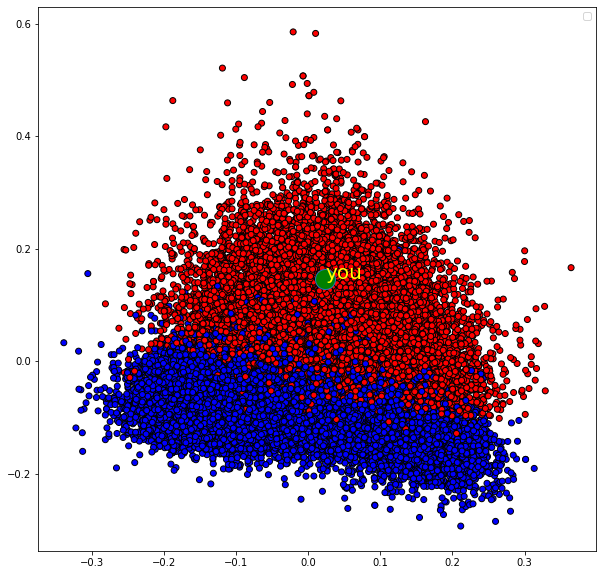

In [ ]:

input = "I don't think climate change is such a problem"
get_similar_quotes(input);



<img src="avatar.jpg" height=300 width=500>

I guess James should go back to work.



To facilate the processing the website we will create a smaller dataframe containing all we need here.

In [ ]:
complete = pd.read_pickle("output/WE_prep_df.pkl") ## previously preprocessed data
complete.head()

,quotation,speaker,date,prep_quote,neg,neu,pos,compound
quoteID,,,,,,,,
2020-02-21-000455,2019 was a landmark year for fiverr as we comp...,Micha Kaufman,2020-02-21 13:00:00,"[landmark, year, fiverr, completed, successful...",0.000,0.634,0.366,0.9117
2020-03-01-005419,councils and communities are passionate about ...,Linda Scott,2020-03-01 16:30:28,"[councils, communities, passionate, bit, waste...",0.095,0.772,0.133,0.1154
2020-03-09-038856,march has the largest amount of acreage burned...,Michael Guy,2020-03-09 07:37:02,"[march, largest, amount, acreage, burned, well...",0.000,0.870,0.130,0.2732
2020-02-13-075454,response to the whole range of russian missile...,Jens Stoltenberg,2020-02-13 09:21:05,"[response, whole, range, russian, missile, sys...",0.000,1.000,0.000,0.0000
2020-02-10-076321,the national energy and climate plans are how ...,Kadri Simson,2020-02-10 05:51:51,"[national, energy, climate, plans, chart, cour...",0.163,0.718,0.119,-0.2585


In [ ]:
model = helpers.get_model()
complete["vectors"] = complete["prep_quote"].apply(lambda tokens : helpers.aggregate(model, tokens))

In [ ]:
_, reduced = extract_extremes(complete.drop(['prep_quote', "date", "neg", "pos", "neu"], axis=1).reset_index(drop=True), threshold=10)
labels = reduced.apply("compound").apply(lambda val : 1 if val < 0.282 else -1)
reduced["compound"] = labels
reduced.head()

,quotation,speaker,compound,vectors
0,2019 was a landmark year for fiverr as we comp...,Micha Kaufman,-1,"[0.030069906, 0.04235905, -0.021099182, -0.004..."
6,we all are seeing and feeling changes we could...,Paul Tash,1,"[0.023389712, 0.07230679, -0.0035898215, -0.01..."
9,doctors okolo and fallouh violated their oaths...,Josh Shapiro,1,"[0.02244321, 0.07283852, -0.005047998, -0.0169..."
13,we are committed to providing high quality mod...,Jin Hao,-1,"[-0.02177143, 0.060701475, -0.025577523, -0.03..."
14,we have invested more than 1 billion in the af...,Charlie Baker,-1,"[0.043354154, 0.033985, -0.007005631, -0.00223..."


In [ ]:
reduced.to_pickle("output/reduced_bonus.pkl")

Now here is a (practicaly) standalone function that can be used in the backend of the website to provide a cool experience for the user.

In [ ]:
def get_similar_quote(quote):
  ## big overhead here can we compute it only once ?
  start = time()
  data = pd.read_pickle("output/reduced_bonus.pkl")
  cneg = data[data["compound"] == 1].vectors
  cpos = data[data["compound"] == -1].vectors
  print(f"init took {round(time() - start, 2)} s")
  start = time()
  vec_space = np.vstack(data.vectors.values)
  vec = helpers.aggregate(model, helpers.preprocess_quote(quote))

  dists = helpers.__dist(model, vec, vec_space)
  closest_idx = np.argmin(dists)
  quote_entry = data.iloc[closest_idx]
  speaker = quote_entry.speaker
  quote = quote_entry.quotation

  quote_point = vec.reshape((1, -1))
  print(f"processing took {round(time() - start, 2)} s")
  start = time()
  helpers.show_quote_in_set(vec_space, dimensions=2, colors=helpers.get_cmap_from_labels(data.compound.values), quote_point=quote_point, show=False)
  print(f"displaying took {round(time() - start, 2)} s")
  return speaker, quote

init took 0.35 s
processing took 0.17 s


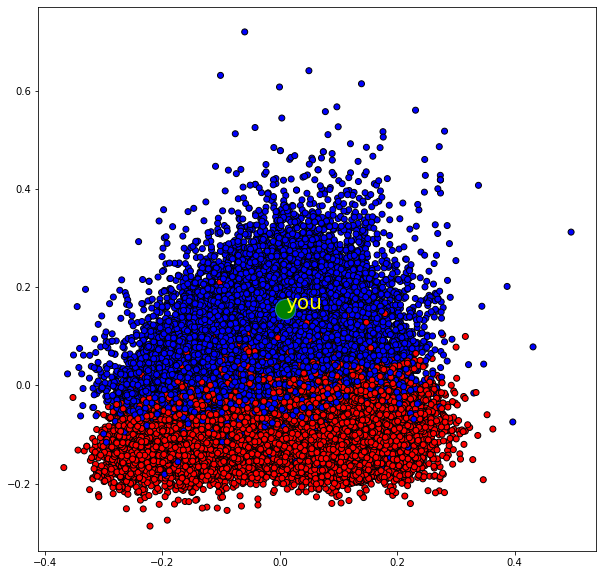

displaying took 8.49 s


('Nick Bostrom',
 'ai is a bigger threat to human existence than climate change climate change is not going to be the biggest change we see this century ')

In [ ]:
get_similar_quote("I don't think climate change exists")

# Semantic difference per categories

We saw that the semantic difference between the points that are polarized positively and negatively is positif and significant but steady over time. Let's now see if this distance varies over time about different topic of discussion.

In [ ]:
subjects = dfs.merge(pd.read_pickle("output/sanitized_strict_dummies"), on="quoteID")
subjects.head()

,quotation_x,speaker,date,prep_quote,neg,neu,pos,compound,month,year,dayless_date,quotation_y,aerosol,agriculture,atmosphere,biosphere,carbon,climate,climatology,coral,desertification,earth,emission,fossil,fuel,geosphere,glacier,warming,greenhouse,hydrosphere,methane,precipitation,solar,temperatureemissions,energy,gas,gases,petrol,wildfires,permafrost,extinct,extinction,IPCC,COP,coal,nuclear,GHG,drought,hurricane,typhoon,net-zero,deforestation,sustainable,sustainability,hydroalbedo,anthropogenic,biofuels,biomass,footprint,sequestration,cryosphere,ecosystem,biodiversity,ozone,recycling,resilience,wastewatermitigation,anthropocene,AR4,AR5,CO2
quoteID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01-005419,councils and communities are passionate about ...,Linda Scott,2020-03-01 16:30:28,"[councils, communities, passionate, bit, waste...",0.095,0.772,0.133,0.1154,3,2020,2020-03-01,councils and communities are passionate about ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-03-09-038856,march has the largest amount of acreage burned...,Michael Guy,2020-03-09 07:37:02,"[march, largest, amount, acreage, burned, well...",0.000,0.870,0.130,0.2732,3,2020,2020-03-01,march has the largest amount of acreage burned...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-02-10-076321,the national energy and climate plans are how ...,Kadri Simson,2020-02-10 05:51:51,"[national, energy, climate, plans, chart, cour...",0.163,0.718,0.119,-0.2585,2,2020,2020-02-01,the national energy and climate plans are how ...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-19-078988,we all are seeing and feeling changes we could...,Paul Tash,2020-03-19 00:00:00,"[seeing, feeling, changes, could, imagined, ev...",0.141,0.790,0.069,-0.6369,3,2020,2020-03-01,we all are seeing and feeling changes we could...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-04-15-075762,we ve lost business in our village but on a gl...,Julie Wright,2020-04-15 16:15:00,"[lost, business, village, global, scale, lot, ...",0.053,0.841,0.105,0.3818,4,2020,2020-04-01,we ve lost business in our village but on a gl...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
metrics_per_subject = []
for subject in subjects.columns[12:].values:
  print("COMPUTATION FOR SUBJECT ", subject, " :")
  metrics_per_subject.append(helpers.par_process(subjects[subjects[subject] == 1], model, sentiment="compound", display_dims=3))

In [ ]:
metrics_per_subject = np.array(list(map(lambda x: np.array(list(x)), list(metrics_per_subject))))

## the computation was quite long so we save the result
with open("metrics_per_subject.npy", "wb") as f:
  np.save(f, metrics_per_subject)

We plot the result for some example topics :

In [ ]:
topics = list(subjects.columns[12:].values)
wildfires_index = topics.index("wildfires")
CO2_index = topics.index("CO2")
carbon_index = topics.index("carbon")
petrol_index = topics.index("petrol")

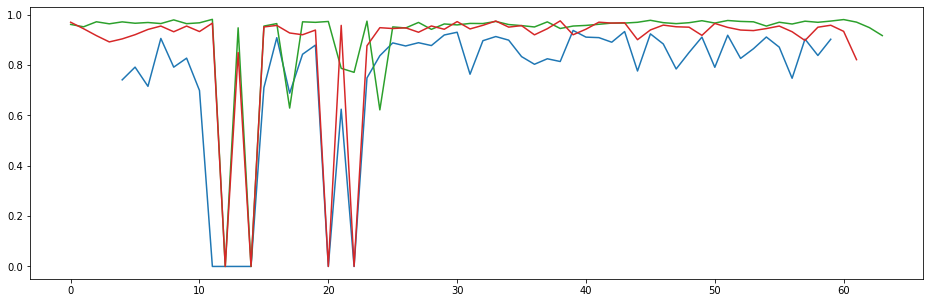

In [ ]:
f, a = plt.subplots(figsize=(16, 5))
for topic in [wildfires_index, CO2_index, carbon_index, petrol_index]:
  plt.plot(metrics_per_subject[topic], label=topics[topic])
a.set_ylabel("normalized cut")
a.set_xlabel("time")
a.set_title("Evolution of the normalized cut for different topics over time")
a.set_xticks(xticks)
a.set_xticklabels(xticklabels)
plt.legend()
plt.savefig("antoine_plots/random_subject_nc.png", dpi=300);

We can see that the noise in 2016 is still present. In future study we will only consider the dates after 2016 to have meaningful values. We can also see that depending on the topic the normalized cut is different eventhough it stays around similar orders of magnitude.

# Analysis of the metrics per subjects

In [ ]:
metrics = np.load("metrics_per_subject.npy", allow_pickle=True)

We chose to display some difference in evolution for different topics :    
- deforestation 
- hurricane
- ozone
- methane
- energy

In [ ]:
metrics_deforestation = metrics_per_subject[39]
metrics_hurricane = metrics_per_subject[36]
metrics_ozone = metrics_per_subject[51]
metrics_methane = metrics_per_subject[18]
metrics_energy = metrics_per_subject[22]

In [ ]:
import sklearn

model = sklearn.linear_model.LinearRegression()

def linear_regression(metrics, limit):
  """
  Computes a linear regression for the values of normalized cut time serie of a these values

  input :
    - metrics : set of normalized cut values throughout time
    - limit : set of studied month (usually to get rid of 2016 dates)
  """
  X = np.arange(limit.shape[0]).reshape((-1, 1))
  reg = model.fit(X, metrics[limit])
  return reg.coef_[0], reg.intercept_

def plot_nc(metrics, label, limit, ax, xticks, xticklabels):
  """
  plots the normalized cut evolution through time alongside the linear regression
  """
  ax.plot(metrics[limit], label=label)
  ax.set_xticklabels(xticklabels, rotation=45)
  coefs = linear_regression(metrics, limit)
  ax.plot(np.arange(limit.shape[0])*coefs[0] + coefs[1], label="linear regression")
  ax.text(s=f"slope : {round(coefs[0], 4)}", x=1, y=0.75, fontsize=15)
  ax.legend()

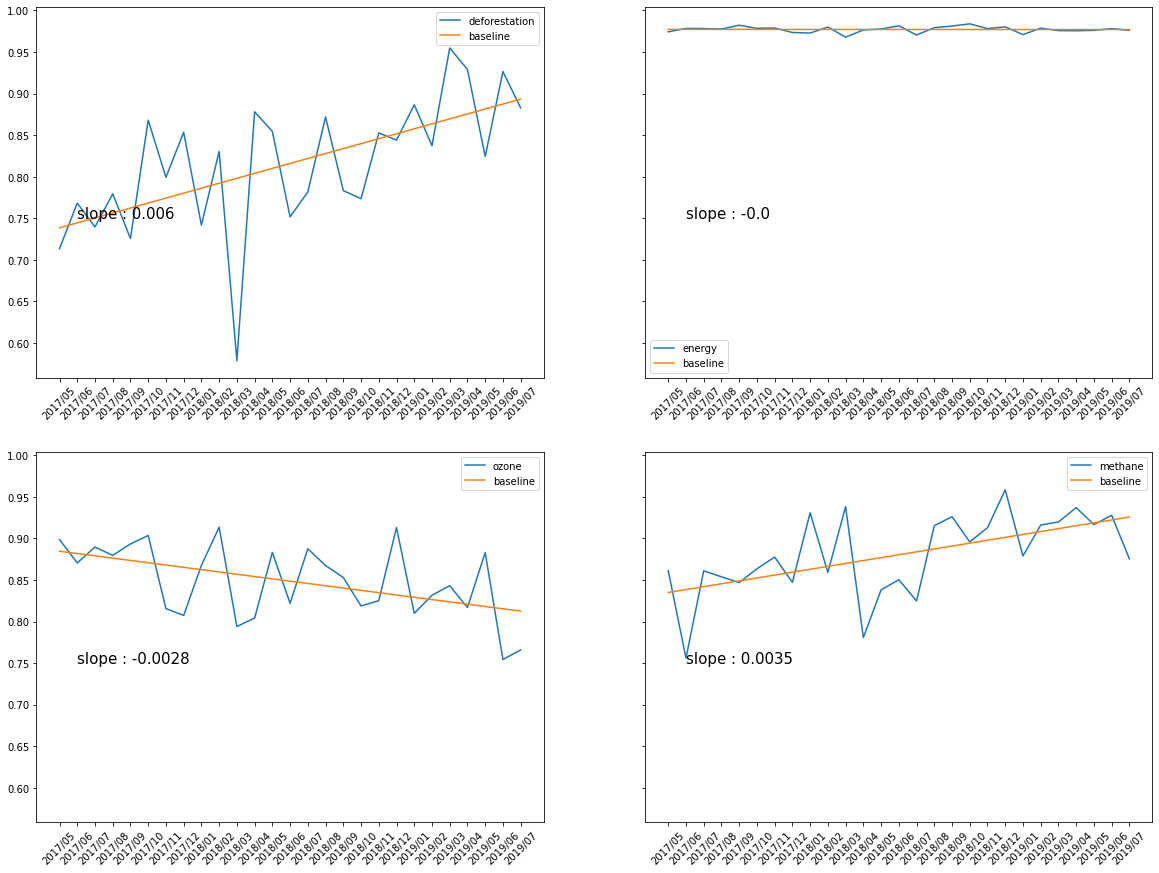

In [ ]:
limit = np.arange(28, 55)
f, a = plt.subplots(2, 2, figsize=(20, 15), sharey=True)
xticks = np.arange(len(np.unique(dfs.sort_values("dayless_date").dayless_date_verbose.values)[limit]))
xticklabels = np.unique(dfs.sort_values("dayless_date")[["year", "month"]].apply(lambda e : str(e[0]) + "/" + ("%02d" % e[1]), axis=1).values)[limit]

plot_nc(metrics_deforestation, label="deforestation", limit=limit, ax=a[0][0], xticks=xticks, xticklabels=xticklabels)
plot_nc(metrics_energy, label="energy", limit=limit, ax=a[0][1], xticks=xticks, xticklabels=xticklabels)
plot_nc(metrics_methane, label="methane", limit=limit, ax=a[1][1], xticks=xticks, xticklabels=xticklabels)
plot_nc(metrics_ozone, label="ozone", limit=limit, ax=a[1][0], xticks=xticks, xticklabels=xticklabels)
f.suptitle("Evoltuion of the normalized cut for some topics throughout time")
f.text(0.5, 0, "time")
f.text(0, 0.5, "normalized cut", rotation=45)
plt.savefig("antoine_plots/subject_nc_evolution.png");

We can see that, for some subject, the semantic difference between the two types of polarization tends to grow over time (like **deforestation** and **methane**), for some it's perfectly steady (like **energy**), and for some it tends to decrease over time (like **ozone**).